In [ ]:
import torch
import clip
from PIL import Image
from pathlib import Path
from fastai.basics import *

/home/molly/miniconda3/envs/fastai/lib/python3.8/site-packages/torch/cuda/__init__.py:104: UserWarning: 
NVIDIA GeForce RTX 3090 with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70 sm_75.
If you want to use the NVIDIA GeForce RTX 3090 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


In [ ]:
torch.cuda.is_available()

True

In [ ]:
path=Path('./danbooru2020')
image_path=path/'512px/0000'

In [ ]:
image_path.ls()

(#3234) [Path('danbooru2020/512px/0000/1000.jpg'),Path('danbooru2020/512px/0000/10000.jpg'),Path('danbooru2020/512px/0000/100000.jpg'),Path('danbooru2020/512px/0000/1000000.jpg'),Path('danbooru2020/512px/0000/1001000.jpg'),Path('danbooru2020/512px/0000/1002000.jpg'),Path('danbooru2020/512px/0000/1003000.jpg'),Path('danbooru2020/512px/0000/1004000.jpg'),Path('danbooru2020/512px/0000/1006000.jpg'),Path('danbooru2020/512px/0000/1008000.jpg')...]

In [ ]:
with open('named_tags.pkl','rb') as f: named_tags=pickle.load(f)
with open('id_tags.pkl','rb') as f: id_tags=pickle.load(f)

In [ ]:
full_table = pd.read_pickle('fulll_table.pkl')

In [ ]:
device = "cpu" #"cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device,jit=False)

image = preprocess(Image.open(path/'512px'/'0175'/'2872175.jpg')).unsqueeze(0).to(device)
text = clip.tokenize([girl_string]+other_strings)#list(filter(lambda t:len(t)<20,iter(named_tags.keys())))).to(device)

In [ ]:
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs.argmax())  # prints: [[0.9927937  0.00421068 0.00299572]]

Label probs: 0


In [ ]:
%debug

> /home/molly/miniconda3/envs/fastai/lib/python3.8/site-packages/torch/nn/functional.py(1852)embedding()
   1850         # remove once script supports set_grad_enabled
   1851         _no_grad_embedding_renorm_(weight, input, max_norm, norm_type)
-> 1852     return torch.embedding(weight, input, padding_idx, scale_grad_by_freq, sparse)
   1853 
   1854 

ipdb> torch.embedding(weight, input, padding_idx, scale_grad_by_freq, sparse)
*** RuntimeError: [enforce fail at CPUAllocator.cpp:65] . DefaultCPUAllocator: can't allocate memory: you tried to allocate 57370593280 bytes. Error code 12 (Cannot allocate memory)
ipdb> p input
tensor([[49406,   273,  1917,  ...,     0,     0,     0],
        [49406,  2431,   318,  ...,     0,     0,     0],
        [49406,  2456,   318,  ...,     0,     0,     0],
        ...,
        [49406,   664,   798,  ...,     0,     0,     0],
        [49406,    84, 19426,  ...,     0,     0,     0],
        [49406,    74,   894,  ...,     0,     0,     0]])
ipdb> p

Restart: 

In [ ]:
text[2]

tensor([49406,  2456,   318,  7813, 49407,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0])

In [ ]:
list(named_tags.keys())[747]

'animated'

In [ ]:
probs.sort()

In [ ]:
girl_string=' '.join(girl_tags[:20])

In [ ]:
other_tags=girl_tags=list(map(lambda t:id_tags[t],full_table[full_table['id']==2872175]['tags'].item()))

In [ ]:
other_strings=[' '.join(map(lambda t: id_tags[t],tags[:10])) for tags in full_table[-20:]['tags'].values]

In [ ]:
girl_tags=list(map(lambda t:id_tags[t],full_table[-20:]['tags']))

TypeError: unhashable type: 'IntegerArray'

In [ ]:
list(map(lambda t:id_tags[t],full_table[full_table['id']==2872175]['tags'].item()))

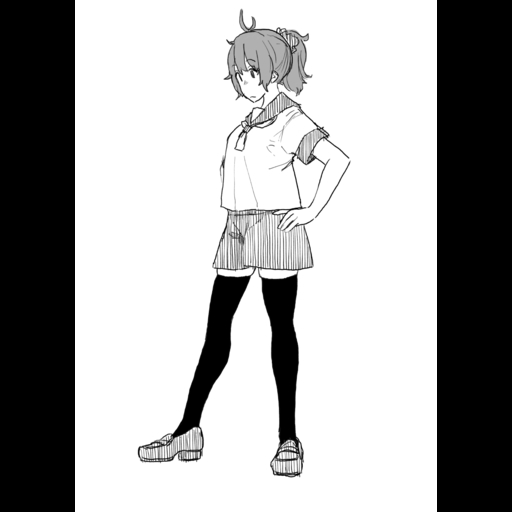

In [ ]:
Image.open(path/'512px'/'0175'/'2872175.jpg')

In [ ]:
full_table[full_table['id']==2872175]['tags']

<IntegerArray>
[ 470575,    9114, 1247173,  613194,  513837,  380350,  426491,    1566,
 1231860, 1377427,  401601,    1681,  438623,    2355,   16509,  268819,
    8672,  412368,    1882,  515193,   10644]
Length: 21, dtype: UInt32

In [ ]:
full_table[-20:]['id'].to_numpy()

array([2256300, 2578548, 1785578, 2110795, 1991054, 2524372, 2107766,
       2549262, 1929375, 1957696, 1925496, 1914584, 2235088, 1924362,
       2112774, 1957699, 1661819,  632933, 1419820, 3717636], dtype=uint32)

In [ ]:
id_tags[1,2,3]

KeyError: (1, 2, 3)